# Alessio Reitano - 0001005384

In [257]:
# Imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

# Variables
file_name = 'movies_tv_shows.csv'
separator = ','
random_state = 43

# Directives
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]
np.random.seed(random_state)
plt.style.use('ggplot')

In [258]:
df = pd.read_csv(file_name, sep=separator, encoding = "ISO-8859-1") #dataset not in utf-8

In [259]:
df.shape

(12035, 13)

In [260]:
df.columns

Index(['Sl.No', 'Title', 'Description', 'Genres', 'Cast', 'Director',
       'Production Country', 'Added On', 'Year', 'Text8', 'Duration(in Mins)',
       'Season', 'Rating'],
      dtype='object')

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12035 entries, 0 to 12034
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sl.No               12034 non-null  float64
 1   Title               12035 non-null  object 
 2   Description         12035 non-null  object 
 3   Genres              12035 non-null  object 
 4   Cast                10533 non-null  object 
 5   Director            9892 non-null   object 
 6   Production Country  150 non-null    object 
 7   Added On            12035 non-null  object 
 8   Year                12034 non-null  float64
 9   Text8               11737 non-null  object 
 10  Duration(in Mins)   10136 non-null  object 
 11  Season              1900 non-null   object 
 12  Rating              937 non-null    object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


In [262]:
df.describe()

,Sl.No,Year
count,12034.000000,12034.000000
mean,6017.500000,2006.731677
std,3474.060904,22.160818
min,1.000000,1920.000000
25%,3009.250000,2006.000000
50%,6017.500000,2016.000000
75%,9025.750000,2020.000000
max,12034.000000,2022.000000


In [263]:
print('Total duplicate values: {}'.format(df.duplicated().sum()))

Total duplicate values: 0


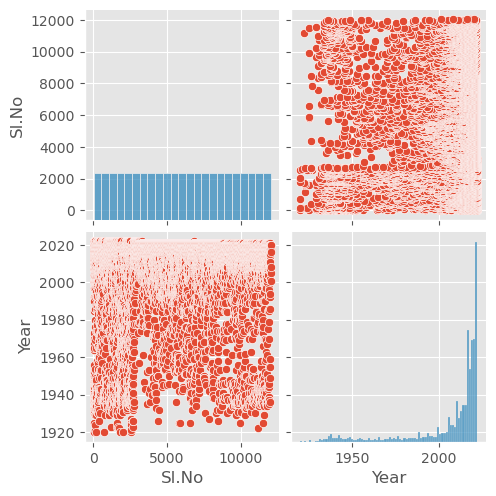

In [264]:
sns.pairplot(df)

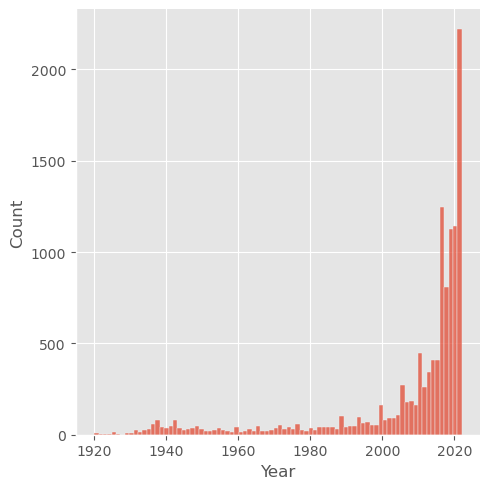

In [265]:
sns.displot(data=df, x = 'Year')

<AxesSubplot:>

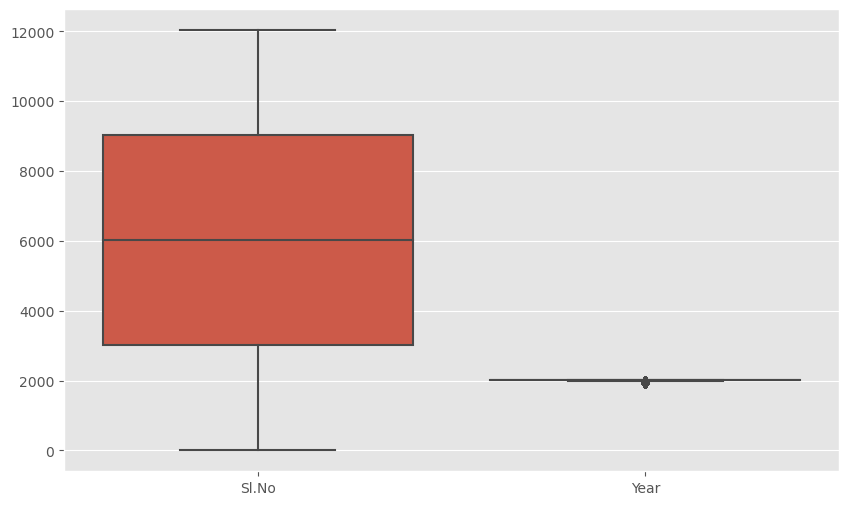

In [266]:
sns.boxplot(data=df)

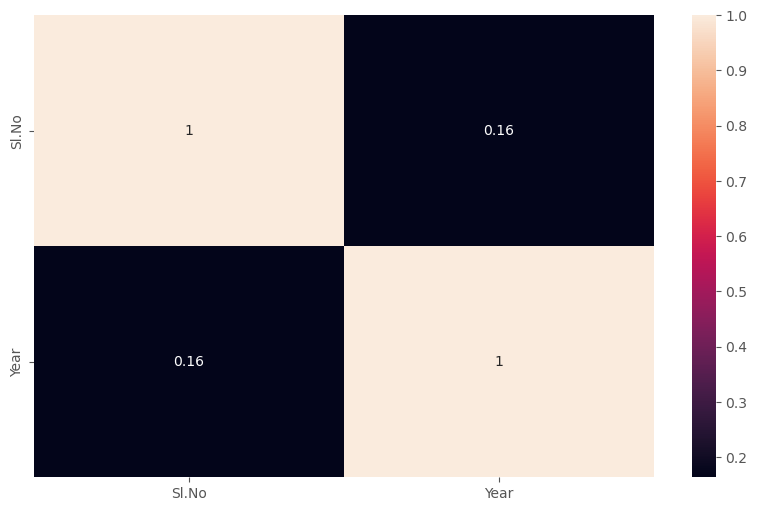

In [267]:
plt.figure()
a=sns.heatmap(df.corr(),annot=True)

In [268]:
df.head()

,Sl.No,Title,Description,Genres,Cast,Director,Production Country,Added On,Year,Text8,Duration(in Mins),Season,Rating
0,1.0,An American Ghost Story,Paul Anderson (Stephen Twardokus) and his girl...,Horror,"Stephen Twardokus, Jon Gale, Liesel Kopp, Wend...",Derek Cole,NaN,"June 19, 2022",2012.0,18+,90,NaN,NaN
1,2.0,Back Door to Heaven,"A young kid, who starts out stealing small thi...","Action, Drama","Wallace Ford, Stuart Erwin",William K. Howard,NaN,"June 19, 2022",1939.0,7+,84,NaN,NaN
2,3.0,Big Timers,A wealthy young society man is dating a beauti...,"Arts, Entertainment, and Culture, Comedy","Stepin Fetchit, Francine Everett",Bud Pollard,NaN,"June 19, 2022",1945.0,7+,36,NaN,NaN
3,4.0,Brand of the Devil,Jolley is the leader of the Devil's Brand gang...,Western,"Dave O'Brien, James Newill",Harry L. Fraser,NaN,"June 19, 2022",1944.0,13+,57,NaN,NaN
4,5.0,Come As You Are,Three young men with disabilities (Grant Rosen...,"Comedy, Drama, Romance","Grant Rosenmeyer, Hayden Szeto, Ravi Patel, Ga...",Richard Wong,NaN,"June 19, 2022",2019.0,18+,107,NaN,NaN


In [269]:
# Analizza i generi dei film presenti nel dataset
genres = df['Genres'].str.split(',').explode().str.strip()
print(genres.value_counts())

Drama                        5042
Comedy                       2926
Action                       2266
Suspense                     1940
Kids                         1209
Horror                       1143
Special Interest             1141
Documentary                  1089
Romance                       873
International                 842
Entertainment                 695
Arts                          695
and Culture                   695
Animation                     653
Science Fiction               544
Adventure                     485
Western                       356
Sports                        213
Music Videos and Concerts     202
Fantasy                       186
Arthouse                      177
TV Shows                      145
LGBTQ                         145
Unscripted                    139
Anime                         102
Young Adult Audience           92
Fitness                        88
Faith and Spirituality         85
Historical                     74
Military and W

In [270]:
# Analizza le valutazioni dei film
ratings = df['Rating'].value_counts()
print(ratings)

6.6       37
6.7       37
5.9       33
6.9       32
6.2       32
          ..
Rating     1
3.3        1
2.6        1
2.0        1
2.8        1
Name: Rating, Length: 67, dtype: int64


In [271]:
# Analizza il cast e il regista dei film
cast = df['Cast'].str.split(',').explode().str.strip()
directors = df['Director'].str.split(',').explode().str.strip()
print(cast.value_counts())
print(directors.value_counts())

Maggie Binkley    61
1                 60
Roy Rogers        50
Prakash Raj       38
Gene Autry        37
                  ..
Harry Singh        1
Sudhir Nema        1
Nawab              1
Sanjay Swaraj      1
Andrew Asper       1
Name: Cast, Length: 36890, dtype: int64
Mark Knight              115
Cannis Holder             62
Moonbug Entertainment     41
Joseph Kane               40
Jay Chapman               34
                        ... 
Shree Jayadrath            1
Irene Zoe Alameda          1
Hooroo Jackson             1
PRATIM D. GUPTA            1
Glenn Miller               1
Name: Director, Length: 7384, dtype: int64


In [272]:
col_to_drop=["Sl.No","Description","Production Country","Added On","Season","Rating"]
df1 = df.drop(col_to_drop,axis=1)

In [273]:
df1 = df1.drop_duplicates(["Title"])
print("Duplicates removed")
df1.shape

Duplicates removed


(11384, 7)

In [274]:
df1.nunique()

Title                11384
Genres                 626
Cast                  9255
Director              6835
Year                   102
Text8                   24
Duration(in Mins)      208
dtype: int64

In [275]:
df1.isna().sum()

Title                   0
Genres                  0
Cast                 1464
Director             2079
Year                    1
Text8                 284
Duration(in Mins)    1837
dtype: int64

In [276]:
df1.dropna(inplace=True)

In [277]:
df1.rename(columns={'Text8':'Rating'},inplace=True)

In [278]:
df1["Duration(in Mins)"] = pd.to_numeric(df1["Duration(in Mins)"])

In [279]:
df1.shape

(8169, 7)

In [280]:
df1.head()

,Title,Genres,Cast,Director,Year,Rating,Duration(in Mins)
0,An American Ghost Story,Horror,"Stephen Twardokus, Jon Gale, Liesel Kopp, Wend...",Derek Cole,2012.0,18+,90
1,Back Door to Heaven,"Action, Drama","Wallace Ford, Stuart Erwin",William K. Howard,1939.0,7+,84
2,Big Timers,"Arts, Entertainment, and Culture, Comedy","Stepin Fetchit, Francine Everett",Bud Pollard,1945.0,7+,36
3,Brand of the Devil,Western,"Dave O'Brien, James Newill",Harry L. Fraser,1944.0,13+,57
4,Come As You Are,"Comedy, Drama, Romance","Grant Rosenmeyer, Hayden Szeto, Ravi Patel, Ga...",Richard Wong,2019.0,18+,107


In [281]:
df1.dtypes

Title                 object
Genres                object
Cast                  object
Director              object
Year                 float64
Rating                object
Duration(in Mins)      int64
dtype: object

In [282]:
rating_count = df1["Rating"].value_counts()
rating_count 

13+         2041
16+         1540
18+         1413
R            956
ALL          564
PG-13        504
7+           478
NR           283
PG           276
G             73
UNRATED       32
NOT_RATE       4
AGES_18_       2
NC-17          2
16             1
Name: Rating, dtype: int64

In [283]:
def mergeRating(i):
    if i in ["G", "ALL", "ALL_AGES"]:
        return 0
    elif i in ["7+"]:
        return 7
    elif i in ["13+", "PG-13"]:
        return 13
    elif i in ["16+", "16"]:
        return 16
    elif i in ["NC-17"]:
        return 17
    elif i in ["18+", "AGES_18_", "R"]:
        return 18
    elif i in ["NR", 'UNRATED', 'NOT_RATE', "PG"]:
        return -1
    return i

df1["Rating"] = df1["Rating"].apply( mergeRating )

df1["Rating"].unique()

array([18,  7, 13, -1,  0, 16, 17])

<AxesSubplot:xlabel='Rating', ylabel='count'>

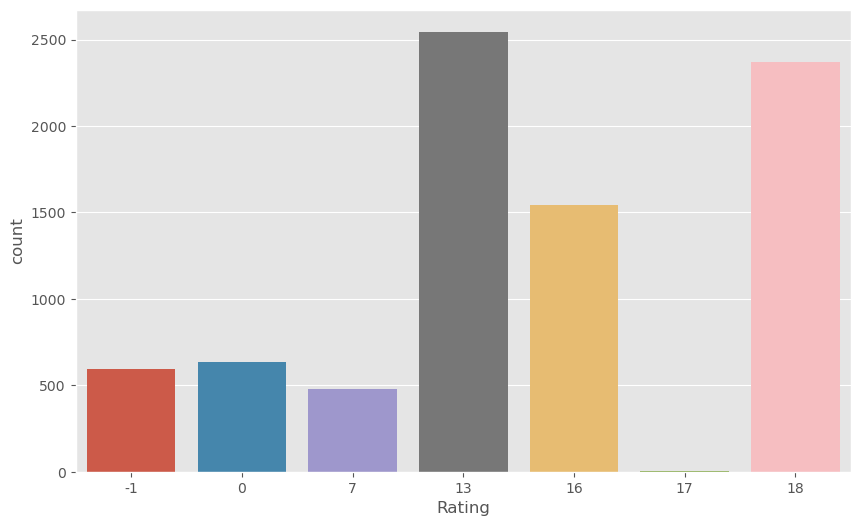

In [284]:
sns.countplot(data=df1, x='Rating') 

In [285]:
df1['Genres'] = df1['Genres'].apply(lambda x: x.split(',')[0])
df1['My_Genres'] = df1['Genres']
df2 = df1.drop(["Genres"],axis=1)

In [286]:
df2['My_Genres'].unique()

array(['Horror', 'Action', 'Arts', 'Western', 'Comedy', 'Documentary',
       'Drama', 'Science Fiction', 'Fantasy', 'Arthouse', 'Suspense',
       'Romance', 'Kids', 'Animation', 'Military and War', 'Adventure',
       'Special Interest', 'Historical', 'Faith and Spirituality',
       'International', 'Anime', 'Unscripted', 'Sports',
       'Music Videos and Concerts', 'LGBTQ', 'Fitness',
       'Young Adult Audience'], dtype=object)

In [287]:
df2.head()

,Title,Cast,Director,Year,Rating,Duration(in Mins),My_Genres
0,An American Ghost Story,"Stephen Twardokus, Jon Gale, Liesel Kopp, Wend...",Derek Cole,2012.0,18,90,Horror
1,Back Door to Heaven,"Wallace Ford, Stuart Erwin",William K. Howard,1939.0,7,84,Action
2,Big Timers,"Stepin Fetchit, Francine Everett",Bud Pollard,1945.0,7,36,Arts
3,Brand of the Devil,"Dave O'Brien, James Newill",Harry L. Fraser,1944.0,13,57,Western
4,Come As You Are,"Grant Rosenmeyer, Hayden Szeto, Ravi Patel, Ga...",Richard Wong,2019.0,18,107,Comedy


In [288]:
df2['Cast'].unique().size

7710

In [289]:
df2['Director'].unique().size

6234

In [290]:
categorical_features = df2.dtypes.loc[df1.dtypes == 'object'].index.values
print("The non-numeric features are:")
print(categorical_features)

The non-numeric features are:
['Title' 'Cast' 'Director' 'My_Genres']


In [291]:
numeric_features = list(set(df2.dtypes.index.values)-set(categorical_features))
print("The numeric features are:")
print(numeric_features)

The numeric features are:
['Duration(in Mins)', 'Rating', 'Year']


In [292]:
categorical_features = list(set(categorical_features))
print("The categorical features are:")
print(categorical_features)

The categorical features are:
['Cast', 'Title', 'My_Genres', 'Director']


In [294]:
transf_dtype = np.int32

categorical_transformer = OneHotEncoder(handle_unknown='ignore'
                                        , sparse = False
                                        , dtype = transf_dtype)
ordinal_transformer = OrdinalEncoder(dtype = transf_dtype)
preprocessor = ColumnTransformer(
    transformers = [('cat', categorical_transformer, categorical_features),
                    ('ord', ordinal_transformer, numeric_features)
                   ],
                    remainder = 'passthrough'
    )
df2_p = preprocessor.fit_transform(df2)

In [295]:
#pd.Dataframe transform ndarray into pandas dataframe
df_p = pd.DataFrame(df2_p)
df_p

,0,1,2,3,4,5,6,7,8,9,...,22133,22134,22135,22136,22137,22138,22139,22140,22141,22142
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,90,6,91
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,84,2,18
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,36,2,24
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,57,3,23
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,107,6,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,18,1,93
8165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,1,95
8166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,86,6,28
8167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,104,6,97
